In [1]:
from pymongo import MongoClient
import pprint
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

db=MongoClient()["comic"]

# 1. 최고의 웹툰

좋아요 수

In [2]:
webtoons=db["webtoons"]

pipeline=[
    {
        '$sort': {
            'likeIt': -1
        }
    }, {
        '$project': {
            '_id': 0, 
            'title': 1, 
            'likeIt': 1
        }
    }, {
        '$limit': 10
    }
]

plist=list(webtoons.aggregate(pipeline))

df=pd.DataFrame(plist)

df=df[::-1]
df

,title,likeIt
9,윈드브레이커,965281
8,여신강림,1002792
7,연놈,1075687
6,복학왕,1102017
5,유미의 세포들,1236798
4,마음의소리,1307140
3,신의 탑,1341927
2,프리드로우,1477292
1,외모지상주의,1996585
0,연애혁명,2237081


<BarContainer object of 10 artists>

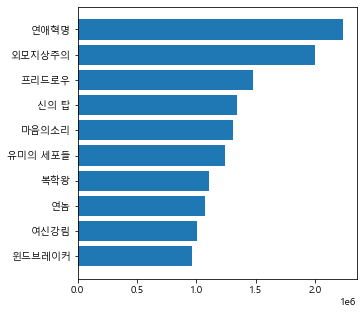

In [3]:
fig, ax = plt.subplots(figsize=(5,5))

plt.ticklabel_format(style='sci', axis='y', scilimits=(3,4))

ax.barh(list(df.title), list(df.likeIt))

# 2. 최고의 에피소드

좋아요 수, 댓글 수

In [4]:
episodes=db["episodes"]

pipeline=[
    {
        '$sort': {
            'totalComment': -1
        }
    }, {
        '$lookup': {
            'from': 'webtoons', 
            'localField': 'titleId', 
            'foreignField': 'titleId', 
            'as': 'webtoon'
        }
    }, {
        '$set': {
            'name': {
                '$arrayElemAt': [
                    '$webtoon.title', 0
                ]
            }
        }
    }, {
        '$project': {
            'totalComment': 1, 
            'episodeNo': 1, 
            'name': 1, 
            '_id': 0
        }
    }, {
        '$limit': 10
    }
]

plist=list(episodes.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,episodeNo,totalComment,name
0,1225,52891,마음의소리
1,300,49619,연애혁명
2,40,27709,사신소년
3,33,24875,체크포인트
4,301,24678,연애혁명
5,1219,23465,마음의소리
6,23,22755,인생존망
7,110,20320,여신강림
8,305,19943,연애혁명
9,109,18816,여신강림


In [5]:
episodes=db["episodes"]

pipeline=[
    {
        '$sort': {
            'likeItCount': -1
        }
    }, {
        '$lookup': {
            'from': 'webtoons', 
            'localField': 'titleId', 
            'foreignField': 'titleId', 
            'as': 'webtoon'
        }
    }, {
        '$set': {
            'name': {
                '$arrayElemAt': [
                    '$webtoon.title', 0
                ]
            }
        }
    }, {
        '$project': {
            'likeItCount': 1, 
            'episodeNo': 1, 
            'name': 1, 
            '_id': 0
        }
    }, {
        '$limit': 10
    }
]

plist=list(episodes.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,episodeNo,likeItCount,name
0,479,57133,유미의 세포들
1,91,52307,바른연애 길잡이
2,484,49777,유미의 세포들
3,301,48486,연애혁명
4,486,48213,유미의 세포들
5,481,47739,유미의 세포들
6,485,47305,유미의 세포들
7,487,47089,유미의 세포들
8,300,45302,연애혁명
9,480,43932,유미의 세포들


# 3. 최고의 댓글

좋아요-싫어요

In [6]:
comments=db["comments"]

pipeline=[
    {
        '$lookup': {
            'from': 'episodes', 
            'localField': 'episodeId', 
            'foreignField': '_id', 
            'as': 'episode'
        }
    }, {
        '$lookup': {
            'from': 'webtoons', 
            'localField': 'episode.titleId', 
            'foreignField': 'titleId', 
            'as': 'webtoon'
        }
    }, {
        '$set': {
            'episodeNo': {
                '$arrayElemAt': [
                    '$episode.episodeNo', 0
                ]
            }, 
            'title': {
                '$arrayElemAt': [
                    '$webtoon.title', 0
                ]
            }
        }
    }, {
        '$sort': {
            'like': -1
        }
    }, {
        '$project': {
            'title': 1, 
            'episodeNo': 1, 
            'like': 1, 
            'contents': 1, 
            '_id': 0
        }
    }, {
        '$limit': 10
    }
]

plist=list(comments.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,contents,like,episodeNo,title
0,어..근데...선넘는게 아니고 남자화장실 들어갈뻔한 주경이 챙겨준거같은데....(난...,111123,109,여신강림
1,안녕하세요 송파에서 운세를 잘 맞춘다고 유명한 아기동자입니다. 만약 이 댓글에 좋아...,103251,51,이제 곧 죽습니다
2,아 미친ㅋㅋㅋㅋㅋㅋ고운이 들어올따 진짜 터짐ㅋㅋㅋㅋㅋㅋㅋㅋ좀 충격일듯ㅋㅋㅋㅋㅋㅋㅋㅋ...,98979,106,여신강림
3,나유연 장점\n군필\n4살차이\n단거 좋아하지만 아메리카노 먹는 스윗함\n키 큼\n...,93268,98,바른연애 길잡이
4,윰세포 회차중에 사랑세포랑 사랑세포가 껴안은거 본적없자나...서로 순수하게 가진 호...,91265,479,유미의 세포들
5,와 자림이 진짜 많이 변했다 ㅜㅜㅜㅜㅜㅜㅜㅜ 그냥 둘이 헤어지지말고 제발 오래가라....,87055,298,연애혁명
6,밀긴 뭘 밀어줘 바리깡으로 머리카락을 밀어버릴까,85684,304,연애혁명
7,서준이 옷도 오바 행동도 오바네,85447,109,여신강림
8,고1이 복싱 15년 어케했누 ㅋㅋㅋㅋㅋ,85139,20,인생존망
9,왘ㅋㅋ크기봐ㅋㅋㅋㅋ순록이 얼마나 응큼한거냐ㅋㅋㅋㅋ속이 시커먼 짐승이었어 ㅋㅋㄱ,85056,486,유미의 세포들


# 장르로 묶었을 때


In [27]:
webtoons=db['webtoons']

pipeline=[
    {
        '$unwind': {
            'path': '$genre'
        }
    }, {
        '$match': {
            'genre': {
                '$in': [
                    '스토리', '에피소드', '옴니버스'
                ]
            }
        }
    }, {
        '$group': {
            '_id': '$genre', 
            'amount': {
                '$sum': 1
            }, 
            'like': {
                '$sum': '$likeIt'
            }
        }
    }, {
        '$set': {
            'avgLike': {
                '$divide': [
                    '$like', '$amount'
                ]
            }, 
            'title': '$_id'
        }
    }, {
        '$project': {
            '_id': 0, 
            'avgLike': 1, 
            'title': 1,
            'amount':1
        }
    }
]

plist=list(webtoons.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,amount,avgLike,title
0,13,154522.769231,옴니버스
1,289,155670.961938,스토리
2,32,220220.406250,에피소드


In [28]:
webtoons=db['webtoons']

pipeline=[
    {
        '$unwind': {
            'path': '$genre'
        }
    }, {
        '$match': {
            'genre': {
                '$in': [
                    '스토리', '에피소드', '옴니버스'
                ]
            }
        }
    }, {
        '$lookup': {
            'from': 'episodes', 
            'localField': 'titleId', 
            'foreignField': 'titleId', 
            'as': 'episodes'
        }
    }, {
        '$unwind': {
            'path': '$episodes'
        }
    }, {
        '$group': {
            '_id': '$genre', 
            'amount': {
                '$sum': 1
            }, 
            'comments': {
                '$sum': '$episodes.totalComment'
            }
        }
    }, {
        '$set': {
            'avgComment': {
                '$divide': [
                    '$comments', '$amount'
                ]
            }, 
            'title': '$_id'
        }
    }, {
        '$sort':{
            'amount':-1
        }
    }, {
        '$project': {
            '_id': 0, 
            'title': 1, 
            'avgComment': 1
        }
    }
]

plist=list(webtoons.aggregate(pipeline))

avgCommentData=pd.DataFrame(plist)
avgCommentData

,avgComment,title
0,1006.774476,스토리
1,1767.897690,에피소드
2,597.544776,옴니버스


In [29]:
df['avgComment']=avgCommentData['avgComment']

df=df[['title', 'amount', 'avgLike', 'avgComment']]
df['avgLike']=df['avgLike'].round(1)
df['avgComment']=df['avgComment'].round(1)
df

,title,amount,avgLike,avgComment
0,옴니버스,13,154522.8,1006.8
1,스토리,289,155671.0,1767.9
2,에피소드,32,220220.4,597.5


In [30]:
webtoons=db['webtoons']

def pipe(genre):
    pipeline=[
        {
            '$match': {
                'genre': genre
            }
        }, {
            '$unwind': {
                'path': '$genre'
            }
        }, {
            '$group': {
                '_id': '$genre', 
                'sum': {
                    '$sum': 1
                }
            }
        }, {
            '$set': {
                'genre': '$_id'
            }
        }, {
            '$project': {
                '_id': 0
            }
        }, {
            '$match': {
                'genre': {
                    '$nin': [
                        '$genre', genre
                    ]
                }
            }
        }, {
            '$sort': {
                'sum': -1
            }
        }
    ]
    return pipeline

pipeline=pipe('스토리')

plist=list(webtoons.aggregate(pipeline))

s_df=pd.DataFrame(plist)
s_df

,sum,genre
0,77,드라마
1,57,로맨스
2,57,판타지
3,41,스릴러
4,36,액션
5,9,개그
6,6,스포츠
7,3,감성
8,3,시대극


In [31]:
pipeline=pipe('에피소드')

plist=list(webtoons.aggregate(pipeline))

e_df=pd.DataFrame(plist)
e_df

,sum,genre
0,9,드라마
1,6,개그
2,6,일상
3,4,로맨스
4,3,액션
5,2,스릴러
6,1,판타지
7,1,시대극


In [32]:
pipeline=pipe('옴니버스')

plist=list(webtoons.aggregate(pipeline))

o_df=pd.DataFrame(plist)
o_df

,sum,genre
0,6,스릴러
1,3,드라마
2,2,판타지
3,1,개그
4,1,일상


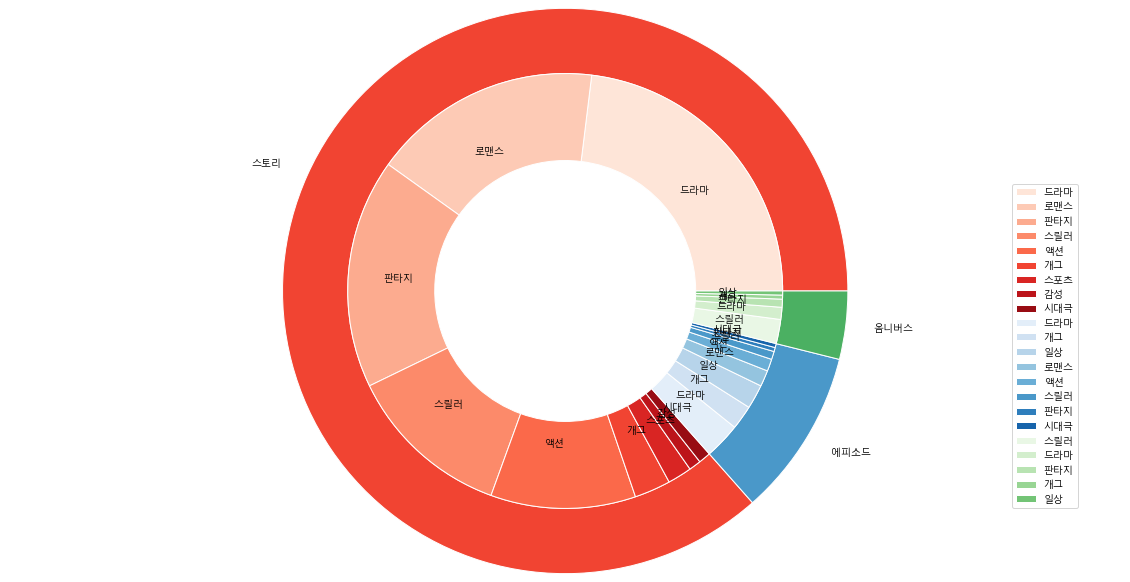

In [39]:
# Make data: I have 3 groups and 7 subgroups
group_names=[df['title'][1], df['title'][2], df['title'][0]]
group_size=[df['amount'][1], df['amount'][2], df['amount'][0]]
subgroup_names=[]
for g in s_df['genre']:
    subgroup_names.append(g)
for g in e_df['genre']:
    subgroup_names.append(g)
for g in o_df['genre']:
    subgroup_names.append(g)
subgroup_size=[]
for n in s_df['sum']:
    subgroup_size.append(n)
for n in e_df['sum']:
    subgroup_size.append(n)
for n in o_df['sum']:
    subgroup_size.append(n)

# Create colors
a, b, c=[plt.cm.Reds, plt.cm.Blues, plt.cm.Greens]
mypie_color=[]
for i in range(1, len(s_df['genre'])+1):
    mypie_color.append(a(0.1*i))
for i in range(1, len(e_df['genre'])+1):
    mypie_color.append(b(0.1*i))
for i in range(1, len(o_df['genre'])+1):
    mypie_color.append(c(0.1*i))

# First Ring (outside)
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors= 
[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, 
labels=subgroup_names, labeldistance=0.7, colors=mypie_color)
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[3:], subgroup_names,loc=(0.9, 0.1))
plt.show()

# 연령분포

In [14]:
webtoons=db['webtoons']

pipeline=[
    {
        '$group': {
            '_id': '$age', 
            'total': {
                '$sum': 1
            }
        }
    }, {
        '$set': {
            'age': '$_id'
        }
    }, {
        '$project': {
            '_id': 0
        }
    }, {
        '$sort': {
            'age': 1
        }
    }
]

plist=list(webtoons.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,total,age
0,143,0
1,89,12
2,93,15
3,9,19


In [15]:
df['age']=['전체연령가', '12세 이용가', '15세 이용가', '19세 이용가']
df=df[['age', 'total']]
df

,age,total
0,전체연령가,143
1,12세 이용가,89
2,15세 이용가,93
3,19세 이용가,9


<BarContainer object of 4 artists>

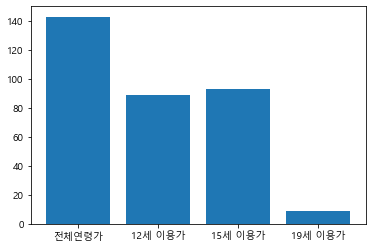

In [16]:
fig, ax = plt.subplots()

ax.bar(list(df.age), list(df.total))

# 요일로 묶었을때

In [17]:
webtoons=db["webtoons"]

pipeline=[
    {
        '$unwind': {
            'path': '$dayrank'
        }
    }, {
        '$group': {
            '_id': '$dayrank.day', 
            'totalLike': {
                '$sum': '$likeIt'
            }, 
            'totalWebtoons': {
                '$sum': 1
            }
        }
    }, {
        '$set': {
            'weekday': '$_id', 
            'avgLike': {
                '$divide': [
                    '$totalLike', '$totalWebtoons'
                ]
            }
        }
    }, {
        '$project': {
            'weekday': 1, 
            'avgLike': 1, 
            '_id': 0
        }
    }, {
        '$sort':{
            'avgLike':1
        }
    }
]

plist = list(webtoons.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,weekday,avgLike
0,sun,111100.857143
1,sat,155627.562500
2,wed,169281.549020
3,thu,173260.255319
4,mon,176405.450980
5,fri,180965.958333
6,tue,185206.500000


In [18]:
df=df.reindex([0, 4, 6, 2, 3, 5, 6]) # 아니 이거 실행할때마다 순서 바뀌는데 value정보로 정렬못하나??
df

,weekday,avgLike
0,sun,111100.857143
4,mon,176405.450980
6,tue,185206.500000
2,wed,169281.549020
3,thu,173260.255319
5,fri,180965.958333
6,tue,185206.500000


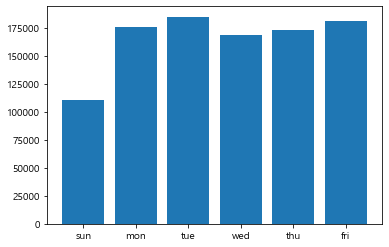

In [19]:
fig, ax = plt.subplots()

ax.bar(list(df.weekday), list(df.avgLike));

# 댓글 시간대

In [20]:
from bson.objectid import ObjectId

comments=db['allComments']

pipeline=[
    {
        '$match': {
            'episodeId': ObjectId('5ecd1f1028a8a267d5fe77b5')
        }
    }, {
        '$project': {
            'contents': 0, 
            'episodeId': 0, 
            '_id': 0
        }
    }
]

plist=list(comments.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,like,date
0,1,2020-05-29 16:00:26
1,0,2020-05-29 14:16:28
2,3,2020-05-29 08:50:26
3,16,2020-05-23 06:28:02
4,3,2020-05-21 03:26:39
...,...,...
10877,2,2020-05-01 14:23:33
10878,1,2020-05-01 14:23:32
10879,1,2020-05-01 14:22:18
10880,0,2020-05-01 14:22:17


Text(0, 0.5, 'like')

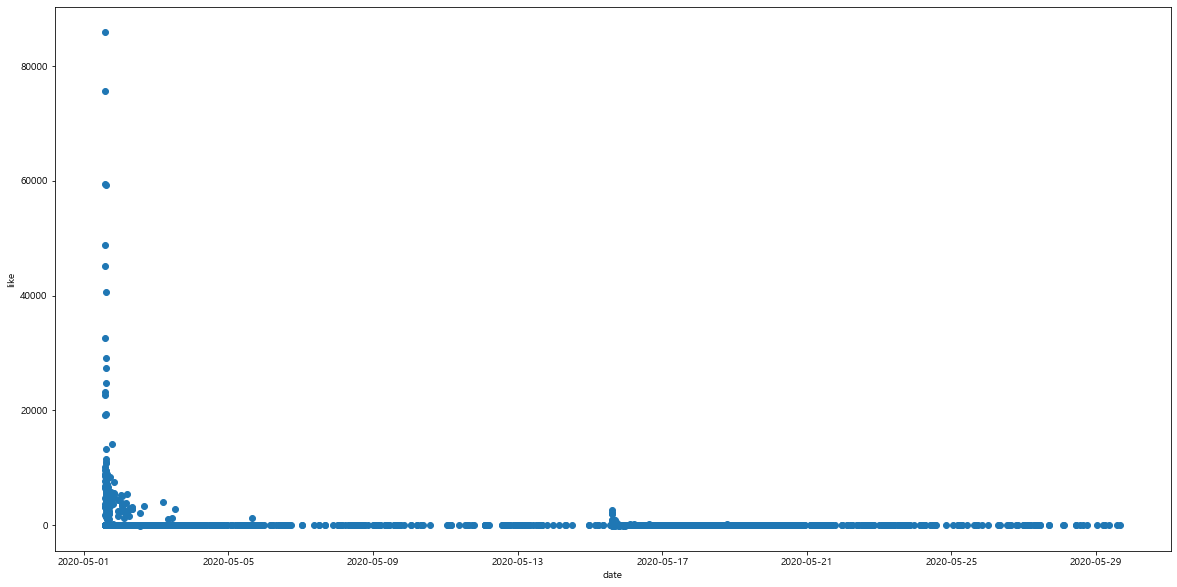

In [21]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter('date','like',data=df)
plt.xlabel("date")
plt.ylabel("like")